# Assignment 1 - Introdução à Aprendizagem Automática

André Eusébio (127600)

Filipe Pereira (131531)

## Exercicio 1


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm
import pandas as pd

- Criar 2 conjuntos de 500 amostras

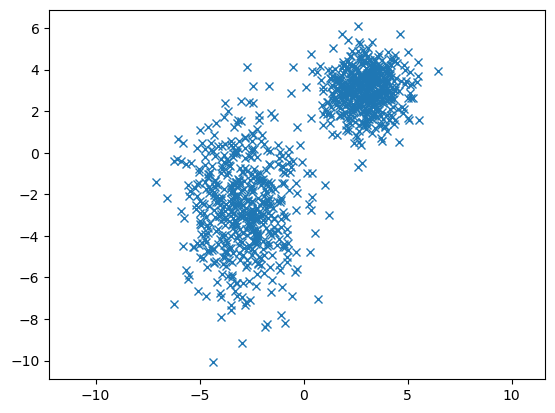

In [2]:
# Define the mean and the covariance for the first dataset
mean = [3, 3]
cov = [[1, 0], [0, 1]]

# Generate 500 samples from a multivariate normal distribution (1st dataset)
a = np.random.multivariate_normal(mean, cov , 500).T

# Define the mean and the covariance for the second dataset
mean = [ -3 , -3]
cov = [ [ 2 , 0] , [0 , 5 ] ]

# Generate 500 samples from a multivariate normal distribution (2nd dataset)
b = np.random.multivariate_normal(mean, cov , 500).T

# Concatenate the datasets alongo the x axis into a single dataset
c = np.concatenate( ( a , b) , axis = 1 )
c = c.T

# Sufle the rows
np.random.shuffle(c)
c = c.T

# Extract the x and y coordinates from the datasets
x = c[0]
y = c[1]

# Plot the points
plt.plot(x , y , 'x')
plt.axis('equal')
plt.show()

- Juntar Coluna ao conjunto A e ao conjunto B a indicar a qual conjunto cada ponto pertence

In [ ]:
# Generate 500 1's
ones = np.ones((500, 1))

# Append the ones to the dataset A
a = np.append(a.T, ones, axis=1).T
a

array([[2.98716342, 2.38210098, 3.32522405, ..., 3.12661679, 4.43133576,
        4.07655752],
       [2.35896621, 3.26756053, 3.42010389, ..., 4.02227262, 2.96500899,
        3.06287067],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [ ]:
# Generate 500 2's
twos = np.full((500,1), 2)

# Append the twos to the dataset B
b = np.append(b.T, twos, axis=1).T
b

array([[-2.95329834, -2.15008321, -3.34351033, ..., -5.46668281,
        -1.8907402 , -2.17738554],
       [-2.64786099, -2.81309469, -8.93598923, ..., -0.75811761,
        -2.39851654, -1.8489392 ],
       [ 2.        ,  2.        ,  2.        , ...,  2.        ,
         2.        ,  2.        ]])

- Juntar ambos os novos conjuntos A e B

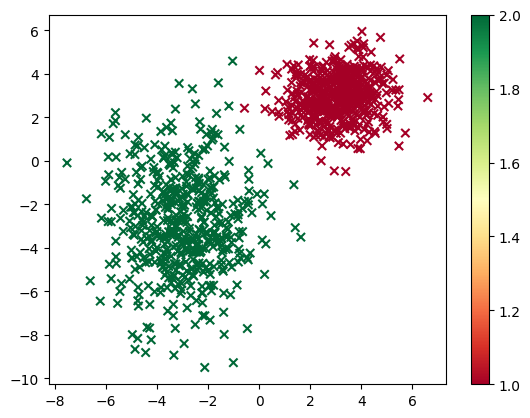

In [ ]:
# Concatenate the two new datasets
# C has now 3 columns
c = np.concatenate((a, b) , axis = 1 )
c = c.T
np.random.shuffle(c)
c = c.T

# Extract the x and y coordinates
x = np.array(c[0])
y = np.array(c[1])

# extract the last column, the qualification column
qualification = np.array(c[2])

scatter = plt.scatter(x, y, c=qualification, cmap='RdYlGn', marker='x')
plt.colorbar(scatter)
plt.show()

- Passar DataFrame para um ficheiro csv

In [ ]:
# Create a dataFrame object 
df_c = pd.DataFrame(c.T, columns=['x','y','qualification'])

# Store the dataFrame in a csv file
df_c.to_csv('2dArray.csv', index=False)
df_c

,x,y,qualification
0,2.242521,3.722746,1.0
1,-4.864969,-8.665176,2.0
2,0.228997,2.390647,1.0
3,-2.623462,-4.937517,2.0
4,3.140540,2.195563,1.0
...,...,...,...
995,-3.005332,-3.830313,2.0
996,3.248979,4.147910,1.0
997,-3.548840,-3.260585,2.0
998,-3.248045,-1.491216,2.0


### Implementação Versão simples K-Mean

- Escolher dois pontos aleatórios do DataFrame

In [ ]:
# Randomly select two points from the dataset
random_points = df_c.sample(n=2)
display(random_points)

r1 = np.array(random_points.iloc[0][['x', 'y']])
r2 = np.array(random_points.iloc[1][['x', 'y']])
print(f'r1 coordinates:\n{r1} \n \nr2 coordinates:\n{r2}')

,x,y,qualification
72,3.204617,1.852617,1.0
337,-6.184801,1.239866,2.0


r1 coordinates:
[3.20461666 1.85261739] 
 
r2 coordinates:
[-6.18480101  1.23986562]


- Atualização valores finais de r1 e r2

In [ ]:
alpha = 1e-3
for index, row in df_c.iterrows():
    point = np.array([row['x'], row['y']])

    dist_r1 = np.linalg.norm(point - r1)
    dist_r2 = np.linalg.norm(point - r2)

    if dist_r1 < dist_r2:
        r1 = (1 - alpha) * r1 + alpha * point
    elif dist_r2 < dist_r1:
        r2 = (1 - alpha) * r2 + alpha * point

print(f'final r1:{r1}\nfinal r2:{r2}')

final r1:[2.94289502 2.94496056]
final r2:[-3.08205599 -2.9692137 ]


- Treino com 10 iterações/epochs

In [ ]:
history_r1 = []
history_r2 = []

random_points = df_c.sample(n=2)
r1 = np.array(random_points.iloc[0][['x', 'y']])
r2 = np.array(random_points.iloc[1][['x', 'y']])

# Append the original r1 and r2 values in the r_history
history_r1.append(r1.copy())
history_r2.append(r2.copy())

alpha = 1e-3
epoch = 0

while epoch < 10:
    epoch += 1
    print(f'Epoch {epoch}')
    for index, row in tqdm(df_c.iterrows(), total=len(df_c), desc="Processing points"):
        point = np.array([row['x'], row['y']])

        dist_r1 = np.linalg.norm(point - r1)
        dist_r2 = np.linalg.norm(point - r2)

        if dist_r1 < dist_r2:
            r1 = (1 - alpha) * r1 + alpha * point
        elif dist_r2 < dist_r1:
            r2 = (1 - alpha) * r2 + alpha * point
    history_r1.append(r1.copy())
    history_r2.append(r2.copy())

print(f'\nfinal r1:{r1}\nfinal r2:{r2}')

Epoch 1


Processing points: 100%|██████████| 1000/1000 [00:00<00:00, 17920.62it/s]


Epoch 2


Processing points: 100%|██████████| 1000/1000 [00:00<00:00, 19087.06it/s]


Epoch 3


Processing points: 100%|██████████| 1000/1000 [00:00<00:00, 19259.01it/s]


Epoch 4


Processing points: 100%|██████████| 1000/1000 [00:00<00:00, 13697.83it/s]


Epoch 5


Processing points: 100%|██████████| 1000/1000 [00:00<00:00, 19027.40it/s]


Epoch 6


Processing points: 100%|██████████| 1000/1000 [00:00<00:00, 13726.07it/s]


Epoch 7


Processing points: 100%|██████████| 1000/1000 [00:00<00:00, 11187.29it/s]


Epoch 8


Processing points: 100%|██████████| 1000/1000 [00:00<00:00, 12961.95it/s]


Epoch 9


Processing points: 100%|██████████| 1000/1000 [00:00<00:00, 13001.08it/s]


Epoch 10


Processing points: 100%|██████████| 1000/1000 [00:00<00:00, 16102.03it/s]


final r1:[2.97005535 2.9730122 ]
final r2:[-3.03368032 -2.91818541]


- Gráfico dos 10 Epochs

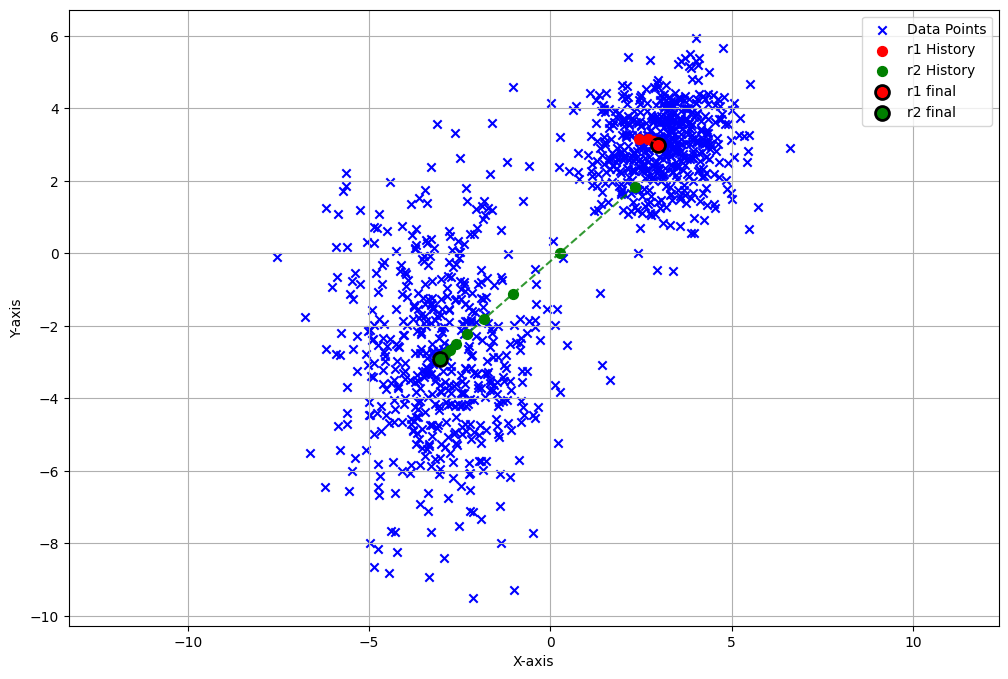

In [ ]:
history_r1_df = pd.DataFrame(history_r1, columns=['r1_x', 'r1_y'])
history_r2_df = pd.DataFrame(history_r2, columns=['r2_x', 'r2_y'])

plt.figure(figsize=(12, 8))
plt.scatter(df_c['x'], df_c['y'], marker='x', color='blue', label='Data Points')
plt.scatter(history_r1_df['r1_x'], history_r1_df['r1_y'], color='red', label='r1 History', marker='o',s=50)
plt.scatter(history_r2_df['r2_x'], history_r2_df['r2_y'], color='green', label='r2 History', marker='o',s=50)
plt.plot(history_r1_df['r1_x'], history_r1_df['r1_y'], color='red', linestyle='--', alpha=0.8)
plt.plot(history_r2_df['r2_x'], history_r2_df['r2_y'], color='green', linestyle='--', alpha=0.8)


final_r1 = history_r1_df.iloc[-1]
final_r2 = history_r2_df.iloc[-1]
plt.scatter(final_r1['r1_x'], final_r1['r1_y'], color='red', s=100, edgecolor='black', linewidth=2, label='r1 final')
plt.scatter(final_r2['r2_x'], final_r2['r2_y'], color='green', s=100, edgecolor='black', linewidth=2, label='r2 final')



plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

- Treino com a **distância** acumulada

In [ ]:
history_r1 = []
history_r2 = []

random_points = df_c.sample(n=2)
r1 = np.array(random_points.iloc[0][['x', 'y']])
r2 = np.array(random_points.iloc[1][['x', 'y']])

history_r1.append(r1.copy())
history_r2.append(r2.copy())

alpha = 0.1
epoch = 0

while epoch < 10:
    epoch += 1
    print(f'Epoch {epoch}')

    d1 = np.zeros(2)
    d2 = np.zeros(2)
    print(d1,d2)

    for index, row in tqdm(df_c.iterrows(), total=len(df_c), desc="Processing points"):
        point = np.array([row['x'], row['y']])

        dist_r1 = np.linalg.norm(point - r1)
        dist_r2 = np.linalg.norm(point - r2)

        if dist_r1 < dist_r2:
            d1 += (point - r1)
        else:
            d2 += (point - r2)

    r1 += (alpha / len(df_c)) * d1  #alpha a dividir por 1000 logo tem de ser maior que o tradicional
    r2 += (alpha / len(df_c)) * d2

    history_r1.append(r1.copy())
    history_r2.append(r2.copy())

print(f'\nfinal r1:{r1}\nfinal r2:{r2}')

Epoch 1
[0. 0.] [0. 0.]


Processing points: 100%|██████████| 1000/1000 [00:00<00:00, 8773.32it/s]


Epoch 2
[0. 0.] [0. 0.]


Processing points: 100%|██████████| 1000/1000 [00:00<00:00, 6488.15it/s]


Epoch 3
[0. 0.] [0. 0.]


Processing points: 100%|██████████| 1000/1000 [00:00<00:00, 8938.26it/s]


Epoch 4
[0. 0.] [0. 0.]


Processing points: 100%|██████████| 1000/1000 [00:00<00:00, 6466.25it/s]


Epoch 5
[0. 0.] [0. 0.]


Processing points: 100%|██████████| 1000/1000 [00:00<00:00, 5962.46it/s]


Epoch 6
[0. 0.] [0. 0.]


Processing points: 100%|██████████| 1000/1000 [00:00<00:00, 5913.62it/s]


Epoch 7
[0. 0.] [0. 0.]


Processing points: 100%|██████████| 1000/1000 [00:00<00:00, 4948.23it/s]


Epoch 8
[0. 0.] [0. 0.]


Processing points: 100%|██████████| 1000/1000 [00:00<00:00, 6693.96it/s]


Epoch 9
[0. 0.] [0. 0.]


Processing points: 100%|██████████| 1000/1000 [00:00<00:00, 6855.69it/s]


Epoch 10
[0. 0.] [0. 0.]


Processing points: 100%|██████████| 1000/1000 [00:00<00:00, 6255.00it/s]


final r1:[2.49900711 2.47062724]
final r2:[-1.95194432 -6.53326545]


### **Resposta ao ponto 3**
A única diferença entre os dois métodos, é que o método da distância acumulada precisa de um alpha maior. Visto que, no algoritmo da distância acumulada o alpha é dividido pelo tamanha do dataset, logo precisamos de um alpha maior.

Quanto aos parâmetros, o número de 10 epochs é suficiente, pois nem estamos a fazer over-fitting nem under-fitting, mão havendo necessidade de o mudar. Já no alpha, verificamos que o valor de 10e-5 era demasiado baixo e que quando era escolhido um ponto mais isolado não conseguia encontrar outro ponto perto, daí termos usado um alpha de grandeza maior, 10e-2.  

- Gráfico final da **distância acumulada**

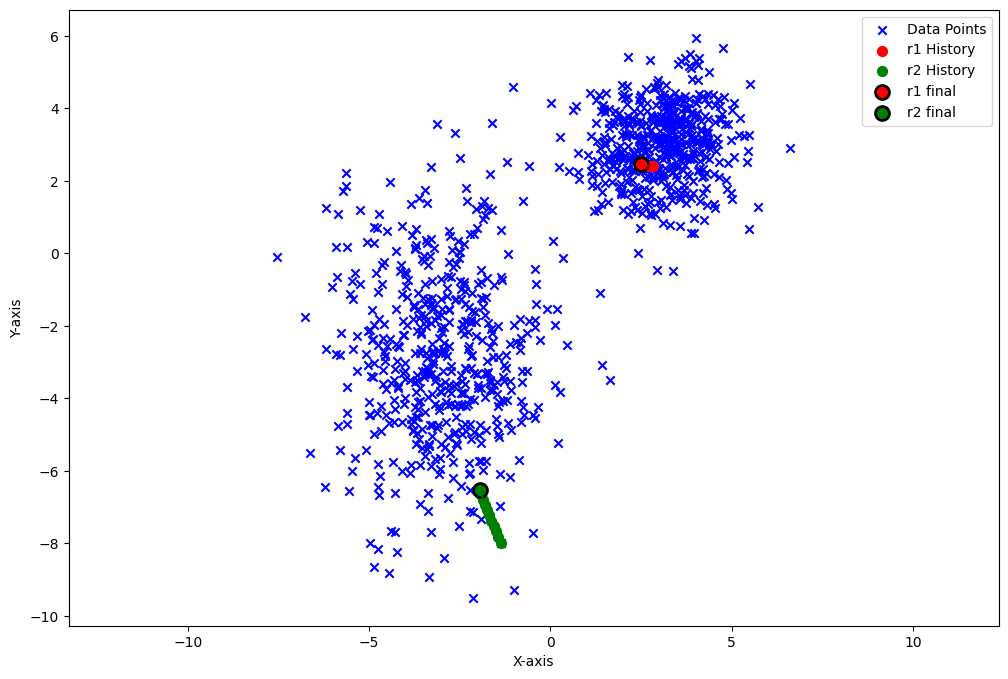

In [ ]:
history_r1_df = pd.DataFrame(history_r1, columns=['r1_x', 'r1_y'])
history_r2_df = pd.DataFrame(history_r2, columns=['r2_x', 'r2_y'])

plt.figure(figsize=(12, 8))
plt.scatter(df_c['x'], df_c['y'], marker='x', color='blue', label='Data Points')
plt.scatter(history_r1_df['r1_x'], history_r1_df['r1_y'], color='red', label='r1 History', marker='o', s= 50)
plt.scatter(history_r2_df['r2_x'], history_r2_df['r2_y'], color='green', label='r2 History', marker='o', s=50)
plt.plot(history_r1_df['r1_x'], history_r1_df['r1_y'], color='red', linestyle='--', alpha=0.8)
plt.plot(history_r2_df['r2_x'], history_r2_df['r2_y'], color='green', linestyle='--', alpha=0.8)

final_r1 = history_r1_df.iloc[-1]
final_r2 = history_r2_df.iloc[-1]
plt.scatter(final_r1['r1_x'], final_r1['r1_y'], color='red', s=100, edgecolor='black', linewidth=2, label='r1 final')
plt.scatter(final_r2['r2_x'], final_r2['r2_y'], color='green', s=100, edgecolor='black', linewidth=2, label='r2 final')


plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.axis('equal')
plt.show()

### **Resposta ao ponto 5**
Durante as 10 iterações os pontos vão se movendo para o centro de cada cluster.

- Gráfico dos clusters e respetivas etiquetas

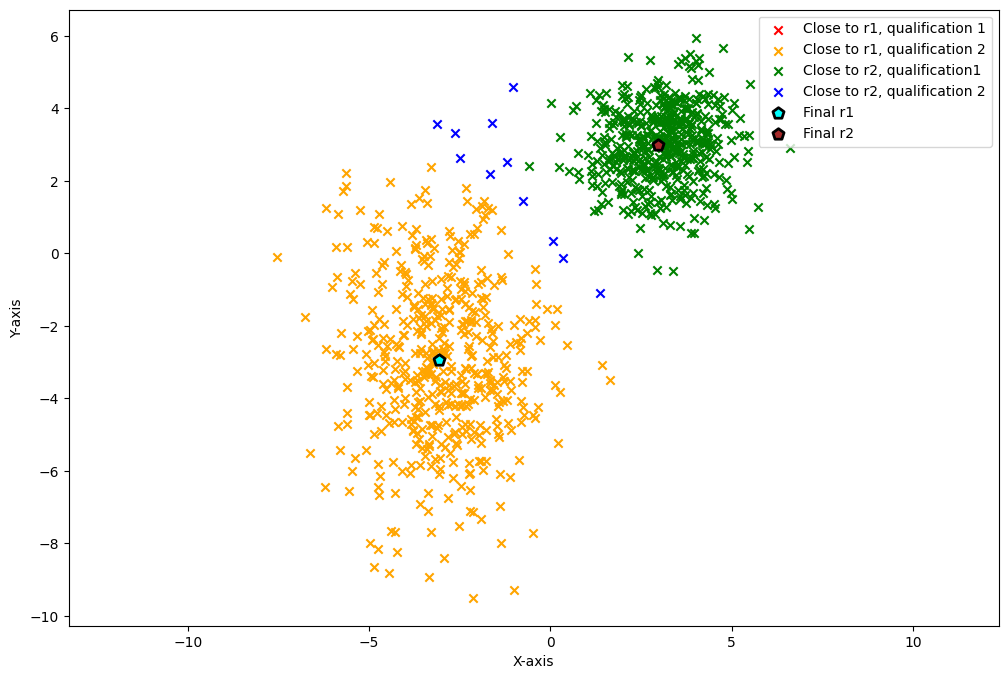

In [ ]:
distances_r1 = np.linalg.norm(df_c[['x', 'y']] - r1, axis=1)
distances_r2 = np.linalg.norm(df_c[['x', 'y']] - r2, axis=1)

df_c['Group'] = np.where(distances_r1 < distances_r2, 1, 2)

plt.figure(figsize=(12, 8))
plt.scatter(df_c[(df_c['Group'] == 1) & (df_c['qualification'] == 1)]['x'],
            df_c[(df_c['Group'] == 1) & (df_c['qualification'] == 1)]['y'],
            color='red', marker='x', label='Close to r1, qualification 1')

plt.scatter(df_c[(df_c['Group'] == 1) & (df_c['qualification'] == 2)]['x'],
            df_c[(df_c['Group'] == 1) & (df_c['qualification'] == 2)]['y'],
            color='orange', marker='x', label='Close to r1, qualification 2')

plt.scatter(df_c[(df_c['Group'] == 2) & (df_c['qualification'] == 1)]['x'],
            df_c[(df_c['Group'] == 2) & (df_c['qualification'] == 1)]['y'],
            color='green', marker='x', label='Close to r2, qualification1')

plt.scatter(df_c[(df_c['Group'] == 2) & (df_c['qualification'] == 2)]['x'],
            df_c[(df_c['Group'] == 2) & (df_c['qualification'] == 2)]['y'],
            color='blue', marker='x', label='Close to r2, qualification 2')

plt.scatter(r1[0], r1[1], color='aqua', marker='p', s=70, edgecolor='black', linewidth=2, label='Final r1')
plt.scatter(r2[0], r2[1], color='brown', marker='p', s=70, edgecolor='black', linewidth=2, label='Final r2')


plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.axis('equal')
plt.show()

### **Resposta ao ponto 6**
Verificamos que o cluster do conjunto 1 tem todos os pontos deste conjunto e também alguns pontos do conjunto 2.
Isto deve-se ao facto do conjunto 2 ter uma maior variância, o que levou a pontos mais "espalhados" e que estão mais perto do cluster do conjunto 1.

- Repetição **nº 30** da experiência

Progress:: 100%|██████████| 30/30 [00:22<00:00,  1.34it/s]


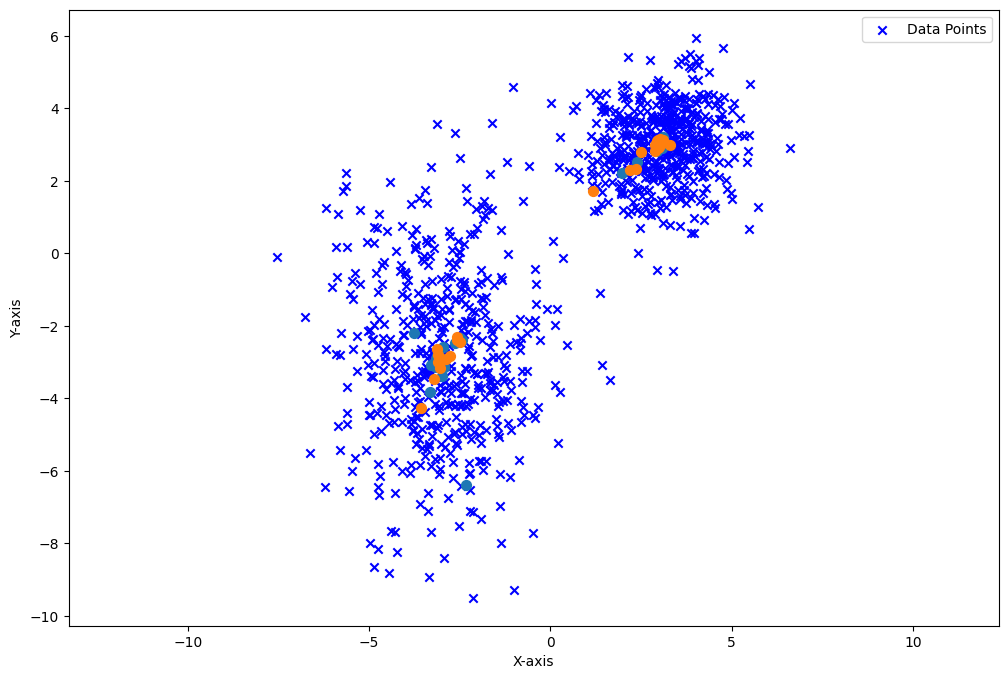

In [ ]:
history_r1_final = []
history_r2_final = []

alpha = 0.5e-3

for i in tqdm(range(30), desc="Progress:"):
  epoch=0
  random_points = df_c.sample(n=2)
  r1 = np.array(random_points.iloc[0][['x', 'y']])
  r2 = np.array(random_points.iloc[1][['x', 'y']])
  while epoch < 10:
      epoch+=1
      for index, row in df_c.iterrows():
          point = np.array([row['x'], row['y']])

          dist_r1 = np.linalg.norm(point - r1)
          dist_r2 = np.linalg.norm(point - r2)

          if dist_r1 < dist_r2:
              r1 = (1 - alpha) * r1 + alpha * point
          elif dist_r2 < dist_r1:
              r2 = (1 - alpha) * r2 + alpha * point
  history_r1_final.append(r1.copy())
  history_r2_final.append(r2.copy())


history_r1_df = pd.DataFrame(history_r1_final, columns=['r1_x', 'r1_y'])
history_r2_df = pd.DataFrame(history_r2_final, columns=['r2_x', 'r2_y'])

plt.figure(figsize=(12, 8))
plt.scatter(df_c['x'], df_c['y'], marker='x', color='blue', label='Data Points')
plt.scatter(history_r1_df['r1_x'], history_r1_df['r1_y'], marker='o', s=50)
plt.scatter(history_r2_df['r2_x'], history_r2_df['r2_y'], marker='o', s=50)


plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.axis('equal')
plt.show()

## Exercício 2 - Implementação versão simples *clustering* hierarquico aglomerativo

- Criar Conjunto de Dados (Código usado anteriormente) para testar o algoritmo

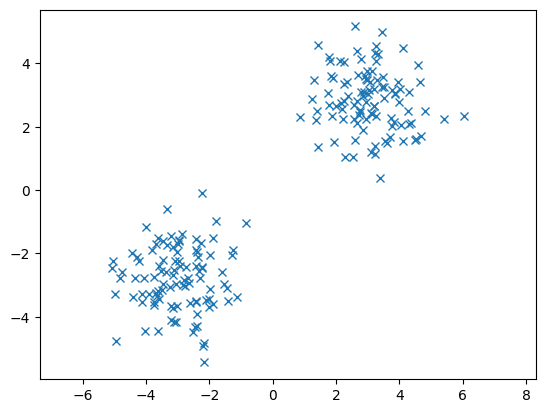

In [ ]:
mean = [3, 3]
cov = [[1, 0], [0, 1]]
a = np.random.multivariate_normal(mean, cov , 100).T

mean = [-3, -3]
cov = [[1, 0], [0, 1]]
b = np.random.multivariate_normal(mean, cov , 100).T

c = np.concatenate((a, b), axis=1)
c = c.T
np.random.shuffle(c)
c = c.T

x = c[0]
y = c[1]

plt.plot(x , y , 'x')
plt.axis('equal')
plt.show()

- Versão simplificada de clustering aglomerativo hierárquico

In [ ]:
pontos = c.T

while len(pontos) > 2:
    menor_distancia = float('inf')
    ponto1 = ponto2 = None

    for i in range(len(pontos)):
        for j in range(len(pontos)):
            dist = np.linalg.norm(pontos[i] - pontos[j])
            if dist < menor_distancia and i!=j:
                menor_distancia = dist
                ponto1, ponto2 = i, j

    novo_ponto = np.median([pontos[ponto1], pontos[ponto2]], axis=0)

    pontos = np.delete(pontos, [ponto1, ponto2], axis=0)
    pontos = np.vstack([pontos, novo_ponto])


    print(f"Substituindo ponto {ponto1} e {ponto2} pela média: {novo_ponto}")

print("Últimos dois pontos restantes:")
print(pontos)


Substituindo ponto 58 e 137 pela média: [3.20642762 2.66216126]
Substituindo ponto 134 e 187 pela média: [3.85686414 3.0491892 ]
Substituindo ponto 27 e 35 pela média: [-2.41960561 -3.51744604]
Substituindo ponto 30 e 140 pela média: [-2.96393467 -1.59377921]
Substituindo ponto 84 e 131 pela média: [3.12081679 2.42505395]
Substituindo ponto 137 e 159 pela média: [-2.43053203 -4.30801379]
Substituindo ponto 57 e 95 pela média: [-2.23032607 -2.45457498]
Substituindo ponto 72 e 76 pela média: [2.96690437 3.49316352]
Substituindo ponto 28 e 54 pela média: [4.49865904 1.59248024]
Substituindo ponto 0 e 89 pela média: [-2.80140716 -3.02572554]
Substituindo ponto 62 e 111 pela média: [3.47216344 3.26379221]
Substituindo ponto 153 e 160 pela média: [-3.09503644 -4.16739701]
Substituindo ponto 36 e 58 pela média: [2.76839886 2.50377957]
Substituindo ponto 61 e 117 pela média: [-2.4056666  -1.92317406]
Substituindo ponto 16 e 50 pela média: [4.32520993 2.09326004]
Substituindo ponto 121 e 152 pe

- Gráfico da versão simplificada de clustering aglomerativo hierárquico

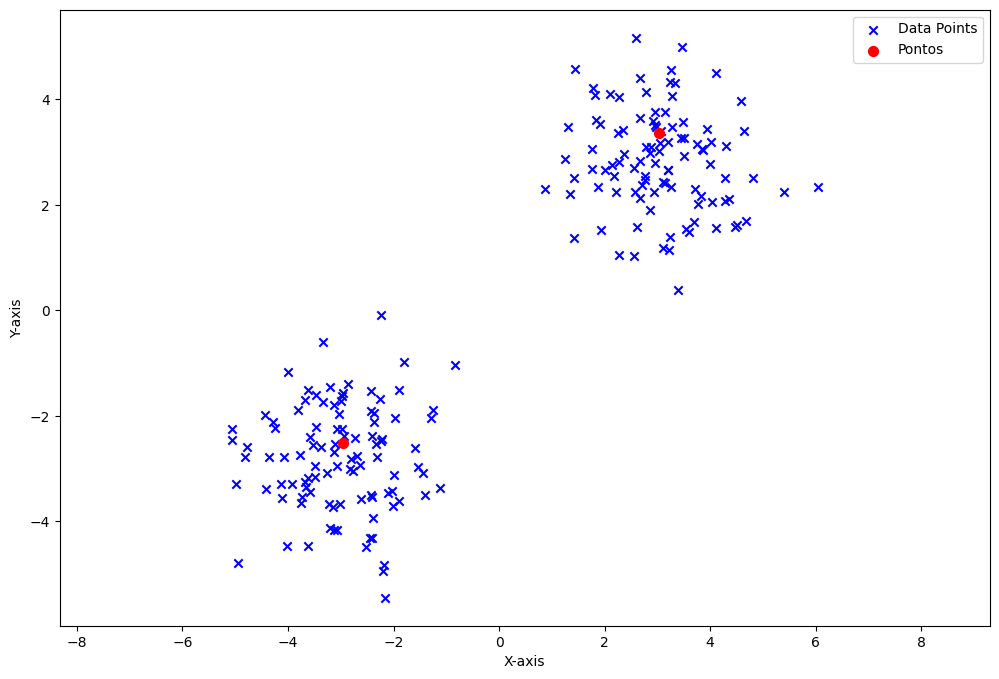

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(c[0], c[1], marker='x', color='blue', label='Data Points')
plt.scatter(pontos[:, 0], pontos[:, 1], marker='o', s=50, color='red', label='Pontos')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.axis('equal')
plt.show()

## Exercicio 3 - Implementação Versão Simplificada do algoritmo DBSCAN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def cluster_region(X, point_idx, eps):
    """
    Find neighbors within `eps` distance of the given point.
    """
    neighbors = []
    for i in range(X.shape[0]):
        if euclidean_distance(X[point_idx], X[i]) <= eps:
            neighbors.append(i)
    return neighbors

def expand_cluster(X, labels, point_idx, cluster_id, eps, min_samples):
    """
    Expands the cluster with all reachable points from the given point.
    """
    neighbors = cluster_region(X, point_idx, eps)

    if len(neighbors) < min_samples:  # Mark as noise
        labels[point_idx] = -1
        return False
    else:
        labels[point_idx] = cluster_id
        queue = deque(neighbors)

        while queue:
            neighbor_idx = queue.popleft()

            if labels[neighbor_idx] == -1:          # Change noise to a border point
                labels[neighbor_idx] = cluster_id
            elif labels[neighbor_idx] == 0:         # If unvisited, visit it
                labels[neighbor_idx] = cluster_id
                neighbor_neighbors = cluster_region(X, neighbor_idx, eps)

                if len(neighbor_neighbors) >= min_samples:
                    queue.extend(neighbor_neighbors)
        return True

def dbscan(X, eps, min_samples):
    """
    DBSCAN algorithm implementation.
    Parameters:
        X: data points
        eps: radius around each point to consider neighbors
        min_samples: minimum number of neighbors for a point to be a core point
    Returns:
        labels: array of cluster labels for each point (-1 for noise)
    """
    labels = np.zeros(X.shape[0])
    cluster_id = 0

    for point_idx in range(X.shape[0]):
        if labels[point_idx] == 0:  # Point is unvisited
            if expand_cluster(X, labels, point_idx, cluster_id + 1, eps, min_samples):
                cluster_id += 1

    return labels

- Gráfico de DBSCAN

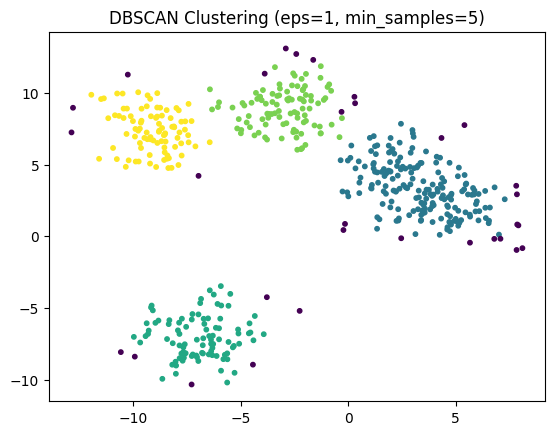

In [ ]:
# Generate sample data
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=500, centers=5, cluster_std=1.5, random_state=42)


# Apply custom DBSCAN
eps = 1
min_samples = 5
labels = dbscan(X, eps, min_samples)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, s=10)
plt.title(f"DBSCAN Clustering (eps={eps}, min_samples={min_samples})")
plt.show()